## Evaluating classifier for the Balloons dataset

First, we import the necessary libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
%pylab inline

import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


 This dataset describes various experiments done with balloons and by identifying some features of it we can predict that if the balloon is inflated or not which I think is very interesting.

Number of attributes: 4

Number of Instances: 20

Attribute Information: (Classes Inflated T or F)
 -  Color             yellow, purple
 -  size              large, small
 -  act               stretch, dip
 -  age               adult, child
 -  inflated          T, F

In [3]:
# Load data
fileURL = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/balloons/adult-stretch.data'
name = ['color', 'size', 'act', 'age', 'inflated']
data = pd.read_csv(fileURL, names=name, header=None)
data

,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F
5,YELLOW,LARGE,STRETCH,ADULT,T
6,YELLOW,LARGE,STRETCH,CHILD,T
7,YELLOW,LARGE,DIP,ADULT,T
8,YELLOW,LARGE,DIP,CHILD,F
9,YELLOW,LARGE,DIP,CHILD,F


Next we replace all the categorical data with numeric values for training.

In [4]:
data[data == 'LARGE'] = 1
data[data == 'DIP'] = 1
data[data == 'ADULT'] = 1
data[data == 'PURPLE'] = 1
data[data == 'T'] = 1
data[data != 1] = 0

In [5]:
data

,color,size,act,age,inflated
0,0,0,0,1,1
1,0,0,0,0,1
2,0,0,1,1,1
3,0,0,1,0,0
4,0,0,1,0,0
5,0,1,0,1,1
6,0,1,0,0,1
7,0,1,1,1,1
8,0,1,1,0,0
9,0,1,1,0,0


Now we use scikit-learn model selection module to create the training and testing sets.

In [6]:
from sklearn.model_selection import train_test_split

y = data['inflated'].tolist()
X = np.asarray(data.drop('inflated', axis=1))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now we train the classifier using the scikit-learn DecisionTreeClassifier.

In [14]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Next after the classifier has been trained I export the decision tree using GraphViz tool for better visualization.

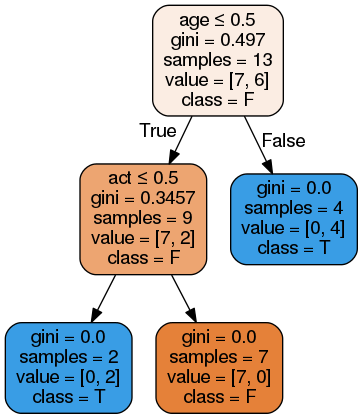

In [15]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=data.columns[:4].tolist(),
                                class_names=['F', 'T'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

Now we predict the test data using the above created classifier.

In [16]:
y_pred = clf.predict(X_test)

In [17]:
y_pred

array([1, 1, 1, 1, 0, 1, 1])

In [18]:
y_test

[1, 1, 1, 1, 0, 1, 1]

It is really awesome to see that the prediction is really accurate but we can find out more by evaluating some metrics.

# Solution 1

The accuracy score of the model can be given as;

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

This clearly depicts that for all the test instances the classification was correct. Though we can see the values directly above there may be some scenarios where the minority class (in this case 0) might get misclassified by the model.

# Solution 2

In [20]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

The precision score of the model is given as

In [21]:
precision_score(y_test, y_pred, average='macro')

1.0

In [22]:
precision_score(y_test, y_pred, average='micro')

1.0

In [23]:
precision_score(y_test, y_pred, average='weighted')

1.0

In [24]:
precision_score(y_test, y_pred, average=None)

array([ 1.,  1.])

Since all the scores are 1 we can clearly say that the model has a very good ability not to label a minority(here 0) as majority(here 1). Now let us see what we can find out about recall.

In [25]:
recall_score(y_test, y_pred, average='macro')

1.0

In [26]:
recall_score(y_test, y_pred, average='micro')

1.0

In [27]:
recall_score(y_test, y_pred, average='weighted')

1.0

In [28]:
recall_score(y_test, y_pred, average=None)

array([ 1.,  1.])

Since all the scores are 1 we can again clearly say that the model has a very good ability to find all of the positive samples in the test data correctly.

# Solution 3

Below is a detailed classification report for the model. This is achieved using scikit-learn.

In [29]:
from sklearn.metrics import classification_report

target_names = ['T', 'F']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          T       1.00      1.00      1.00         1
          F       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00         7



We can see that the f1-score which is actually a encapsulation of both precision and recall is also 1, meaning the model is really good in doing good and really good in avoiding bad. We can also see the support values for classes.

# Solution 4

Next we create a confusion matrix - using scikit-learn again

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1, 0],
       [0, 6]])

As we can see that the matrix clearly depicts that the classification was accurate. Out of 7 points 1 was labelled negative and 6 others as positive. Now since we have the right diagonal as zero we know that there are no false negatives or false positives. This shows that there are only true positives and true negatives which means classification was correct.

# Solution 5 

Now we try to find out the ROC curve of the model to see if it really performs well throughout the whole dataset.

In [33]:
from sklearn.metrics import roc_curve

Now as per the values of y_test and y_pred and along with last few metrics that we have seen we can calculate the probability estimate of the classes. Since there are 7 total points Class 0 is 1/7 and Class 1 is 6/7.

In [34]:
y_test

[1, 1, 1, 1, 0, 1, 1]

In [35]:
y_score = [0.86, 0.86, 0.86, 0.86, 0.14, 0.86, 0.86]

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [37]:
fpr

array([ 0.,  1.])

In [38]:
tpr

array([ 1.,  1.])

In [39]:
thresholds

array([ 0.86,  0.14])

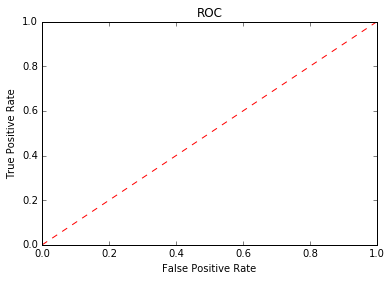

In [42]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

This shows that there is no error in classification for the model and the curve is ideal.

# Solution 6

Now we try to plot the precision-recall curve for this model - using scikit-learn which again uses the estimated probability scores.

In [44]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [45]:
precision

array([ 1.,  1.,  1.,  1.])

In [46]:
recall

array([ 1.        ,  0.83333333,  0.66666667,  0.        ])

In [47]:
thresholds

array([ 0.36,  0.5 ,  0.86])

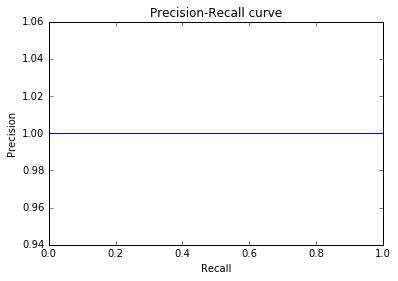

In [49]:
plt.title('Precision-Recall curve')
plt.plot(recall, precision, 'b')
plt.legend(loc='lower right')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

As expected we get a straight line which is consistent - the reason being precision never changes over recall though we might do micro, macro or weighted average. This helps in understanding if the model is at all fit for classifying since sometimes precision might decreases with recall.